In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc("font", size=18, family="serif")
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.utilities.physical_ratios import cm_per_kpc, K_per_keV
from yt.units import mp
import pyxsim
import soxs
import aplpy


/home/aditiv/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aditiv/anaconda3/lib/python3.6/site-packages/yt/analysis_modules/cosmological_observation/api.py:22: VisibleDeprecationWarning: Development of the LightRay module has been moved to the Trident package. This version is deprecated and will be removed from yt in a future release. See https://github.com/trident-project/trident for further information.
  from .light_ray.api import \
/home/aditiv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(me

In [2]:
plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=3
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'

In [3]:
Msun = 2.e33
ks = 1.e3
area = (2000.0, "cm**2") # collecting area
dist=(1.0, "Mpc")
RA,dec = (349.60, -42.0) 
nH = 1.93e-2  #in units of 10^22 /cm/cm
Bins         = np.arange(0.0, 5., 1.e-3)
bins         = np.arange(0.0, 5., 0.13)
t02  = 0
kpc = 3.018e21
mp = 1.67e-24

In [5]:
base     = "/home/aditiv/CGM/Pyxsim/Data/"

folder = "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/" #hdhsfr
# folder ="HR_0821_1e-6_SFR3/"                   #ldlsfr  
    
if (folder == "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/"):
#     filename = "DD0130/"
    filename = "DD0150/"
    file_loc = base + folder + filename 
    outfile  = folder
#     ds       = yt.load(file_loc + "sb_0130")
    ds       = yt.load(file_loc + "sb_0150")
#     t        = 50 * ks
    rho0     = 6.e-28
    t01      = 1.e6
    t02      = 1.8e6

    
elif (folder == "HR_0821_1e-6_SFR3/"):
    filename = "DD0300/"
    file_loc = base + folder + filename 
    outfile  = folder + filename
    ds       = yt.load(file_loc + "sb_0300")
    
t        = 500 * ks    
exp_time = (t, "s") # exposure time
print(ds.field_list)

yt : [INFO     ] 2019-12-09 11:25:50,812 Parameters: current_time              = 1500.0000383547
yt : [INFO     ] 2019-12-09 11:25:50,812 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-12-09 11:25:50,813 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-12-09 11:25:50,813 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-12-09 11:25:50,814 Parameters: cosmological_simulation   = 0.0
Parsing Hierarchy : 100%|██████████| 881/881 [00:00<00:00, 11880.89it/s]
yt : [INFO     ] 2019-12-09 11:25:50,954 Gathering a field list (this may take a moment.)


[('enzo', 'Cooling_Time'), ('enzo', 'Density'), ('enzo', 'GasEnergy'), ('enzo', 'Metal_Density'), ('enzo', 'Temperature'), ('enzo', 'TotalEnergy'), ('enzo', 'x-velocity'), ('enzo', 'y-velocity'), ('enzo', 'z-velocity')]


In [7]:
#Making profile plots of biconical and non-biconical regions
ad = ds.all_data()

along_y = ad.cut_region(" (obj['z'].in_units('kpc')<10)  & (obj['z'].in_units('kpc')>-10) \
                        & (obj['x'].in_units('kpc')<10)  & (obj['x'].in_units('kpc')>-10) ")# \
#                         & (obj['temperature']> 1.e5)     & (obj['temperature'] < 2.e7)" ) 
along_z = ad.cut_region(" (obj['y'].in_units('kpc')<10)  & (obj['y'].in_units('kpc')>-10) \
                        & (obj['x'].in_units('kpc')<10)  & (obj['x'].in_units('kpc')>-10) ") # \
#                         & (obj['temperature']> 1.e5)     & (obj['temperature'] < 2.e7)" ) 


In [9]:
#Make profiles
log = dict(temperature=True, density=True)
obj = [along_y, along_z]
i = 0
for ob in obj:
    profile = yt.create_profile(ob,["radius"],fields=["density"], \
                                    n_bins=[32, 32], weight_field='cell_volume', \
                                    accumulation=False)
    r     = profile.x
    rho = profile["density"]
    
    profile = yt.create_profile(ob,["radius"],fields=["temperature"], \
                                    n_bins=[32, 32], weight_field="cell_mass", \
                                    accumulation=False)
    r     = profile.x
    temp = profile["temperature"]
    
    profile = yt.create_profile(ob,["radius"],fields=["temperature"], \
                                    n_bins=[32, 32], weight_field="cell_volume", \
                                    accumulation=False)
    r     = profile.x
    tempvol = profile["temperature"]
    
    
    profile = yt.create_profile(ob,["radius"],fields=["metallicity"], \
                                    n_bins=[32, 32], weight_field="cell_mass", \
                                    accumulation=False)
    r    = profile.x
    met  = profile["metallicity"]

    
    profile = yt.create_profile(ob,["radius"],fields=["cell_mass"], \
                                    n_bins=[32, 32], weight_field=None, \
                                    accumulation=False)
    r    = profile.x
    mass  = profile["cell_mass"]

    
    np.savetxt(folder + filename + 'Boxes-Random/' + 'profile_allT-' + str(i) + '.txt', \
    np.column_stack([r, rho, temp, tempvol, met, mass]))
    i = i + 1

In [ ]:
f, ax = plt.subplots(2, 2, gridspec_kw = {'wspace':0., 'hspace':0.,},\
                        figsize=(12, 12))
obj = [along_y, along_z]
color = ['darkmagenta', 'darkblue']
label = ['y', 'z']
ls = ['-', '-']
i = 0 
for ob in obj:
    
    r       = np.loadtxt(folder + filename + 'Boxes-Random/' + 'profile_' + str(i) + '.txt', usecols=0)
    rho     = np.loadtxt(folder + filename + 'Boxes-Random/' + 'profile_' + str(i) + '.txt', usecols=1)
    temp    = np.loadtxt(folder + filename + 'Boxes-Random/' + 'profile_' + str(i) + '.txt', usecols=2)
    tempvol = np.loadtxt(folder + filename + 'Boxes-Random/' + 'profile_' + str(i) + '.txt', usecols=3)
    met     = np.loadtxt(folder + filename + 'Boxes-Random/' + 'profile_' + str(i) + '.txt', usecols=4)
#     mass    = np.loadtxt(folder + filename + 'profile_all_' + str(i) + '.txt', usecols=5)
    
    ax[0,0].plot(r/kpc, rho/mp, color=color[i], ls =ls[i],label = label[i])
    ax[1,1].plot(r/kpc, tempvol, color=color[i], ls =ls[i])
    ax[1,1].plot(r/kpc, temp, color=color[i],ls='--', label = 'Mass Averaged')
    ax[1,0].plot(r/kpc, met, color=color[i], ls ='--')
    ax[0,1].axis('off')
    ax[0,1].plot(r/kpc, 0.0*temp, color='black',ls='--', label = 'Mass Averaged')
    ax[0,1].plot(r/kpc, 0.0*temp, color='black',ls='-', label = 'Volume Averaged')
    
    ax[0,1].plot(r/kpc, 0.0*rho/mp, color=color[0], ls =ls[0],label = label[0])
    ax[0,1].plot(r/kpc, 0.0*rho/mp, color=color[1], ls =ls[1],label = label[1])
    if(i==0):ax[0,1].legend(loc='center')
#     ax[1,1].plot(r/kpc, mass/Msun, color=color[i], ls =ls[i])
    
#     if(i):
#         ax[1,0].legend()
#         print(i)
    i = i + 1
# ax[0,0].legend()  


ax[0,0].tick_params('x', which='both', top=True, labelbottom=False)
ax[1,1].tick_params('x', which='both', top=True, labelbottom=True)
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].tick_params('y', which='both', left=True)
plt.setp(ax[1,:],'xticks',(10., 20., 30., 40))
plt.setp(ax[1,1],'xticks',(10., 20., 30., 40., 50))

plt.setp(ax[1,:], 'xlabel', ('Distance From Center [kpc]') )
plt.setp(ax[1,1], 'xlabel', ('Distance From Center [kpc]') )
ax[0,0].set_ylabel(r'$\rho$ [cm$^{-3}$]')
ax[1,1].set_ylabel('Temperature [K]', rotation=270, labelpad=25)
# ax[1,1].set_ylabel(r'Mass [M$_{\odot}$]', rotation=270, labelpad=20)
ax[1,0].set_ylabel(r'Metallicity [Z$_{\odot}$]')
ax[0,0].set_ylim(1.e-4,5.e-3)
ax[1,1].set_ylim(5.e5, 8.e6)
# ax[1,1].set_ylim(1.e7, 2.e8)
plt.setp(ax, 'yscale', 'log')
# plt.setp(ax, 'xscale', 'log')
plt.setp(ax, 'xlim', (10, 50) )
# ax[0,0].text(45.,6e-3, "All T")
plt.savefig(folder + filename + "Boxes-Random/" + "box-rho-T-met-profile.pdf", bbox_inches='tight')

Text(0.5,1,'Along z')

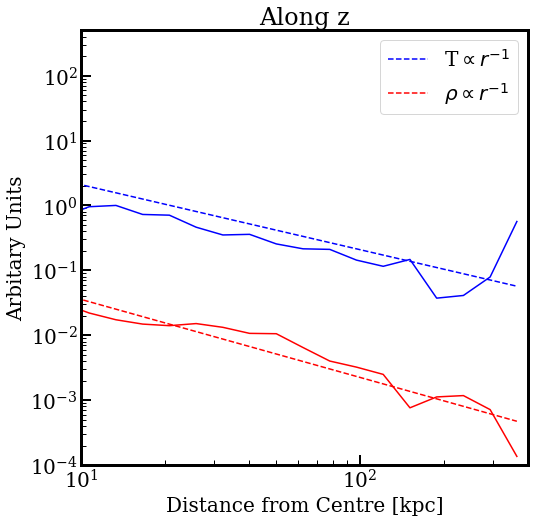

In [14]:
r       = np.loadtxt(folder + filename + 'Boxes-Random/' + 'profile_allT-' + str(1) + '.txt', usecols=0)
rho     = np.loadtxt(folder + filename + 'Boxes-Random/' + 'profile_allT-' + str(1) + '.txt', usecols=1)
temp    = np.loadtxt(folder + filename + 'Boxes-Random/' + 'profile_allT-' + str(1) + '.txt', usecols=2)
plt.figure(figsize=(8,8))
plt.plot(r/kpc,temp/np.amax(temp), color='blue')

plt.xscale('log')
plt.yscale('log')
powerT = 3.5e6*(r/kpc/10)**(-1)
powerRho = 3.e-3*mp*(r/kpc/10)**(-1.2)
plt.plot(r/kpc,1.2*powerT/np.amax(temp), ls='--', color='blue', label = r'T$\propto r^{-1}$')
plt.plot(r/kpc,1.e3*rho/np.amax(rho), color='red')
plt.plot(r/kpc,1.e3*powerRho/np.amax(rho), ls='--', color='red', label = r'$\rho \propto r^{-1}$')
plt.xlim(10.,400.)
plt.xlabel('Distance from Centre [kpc]')
plt.ylabel('Arbitary Units')
plt.legend()
plt.ylim(1.e-4,5.e2)
plt.title('Along z')
# plt.savefig(folder + filename + 'T-rho_vs_r.pdf', bbox_inches='tight')

In [ ]:
# sp        = ds.sphere('c',(50,'kpc'))
ad = ds.all_data()
#Making a Rectangular Box at [0,10,0] kpc, volume = [10,10,800]kpc^3

sim_cry40 = ad.cut_region(" (obj['z'].in_units('kpc')<5) & (obj['z'].in_units('kpc')>-5)\
                     & (obj['y'].in_units('kpc')<45) & (obj['y'].in_units('kpc')>35)  " )

sim_cry30 = ad.cut_region(" (obj['z'].in_units('kpc')<5) & (obj['z'].in_units('kpc')>-5)\
                     & (obj['y'].in_units('kpc')<35) & (obj['y'].in_units('kpc')>25)  " )
 
sim_cry20 = ad.cut_region(" (obj['z'].in_units('kpc')<5) & (obj['z'].in_units('kpc')>-5)\
                     & (obj['y'].in_units('kpc')<25) & (obj['y'].in_units('kpc')>15)  " )

sim_cry10 = ad.cut_region(" (obj['z'].in_units('kpc')<5) & (obj['z'].in_units('kpc')>-5)\
                      & (obj['y'].in_units('kpc')<15) & (obj['y'].in_units('kpc')>5)  " )

#Making a Rectangular Box at [0,10,0] kpc, volume = [10,10,800]kpc^3

sim_crz40 = ad.cut_region(" (obj['y'].in_units('kpc')<5) & (obj['y'].in_units('kpc')>-5)\
                     & (obj['z'].in_units('kpc')<45) & (obj['z'].in_units('kpc')>35)  " )

sim_crz30  = ad.cut_region(" (obj['y'].in_units('kpc')<5) & (obj['y'].in_units('kpc')>-5)\
                     & (obj['z'].in_units('kpc')<35) & (obj['z'].in_units('kpc')>25)  " )
 
sim_crz20  = ad.cut_region(" (obj['y'].in_units('kpc')<5) & (obj['y'].in_units('kpc')>-5)\
                     & (obj['z'].in_units('kpc')<25) & (obj['z'].in_units('kpc')>15)  " )

sim_crz10  = ad.cut_region(" (obj['y'].in_units('kpc')<5) & (obj['y'].in_units('kpc')>-5)\
                    & (obj['z'].in_units('kpc')<15) & (obj['z'].in_units('kpc')>5)  " )


In [ ]:
# sp        = ds.sphere('c',(50,'kpc'))
ad = ds.all_data()
#Making a Rectangular Box at [0,10,0] kpc, volume = [10,10,10]kpc^3

sim_cry40 = ad.cut_region(" (obj['z'].in_units('kpc')<5) & (obj['z'].in_units('kpc')>-5)\
                     &      (obj['x'].in_units('kpc')<5) & (obj['x'].in_units('kpc')>-5)\
                     &      (obj['y'].in_units('kpc')<45) & (obj['y'].in_units('kpc')>35)  " )

sim_cry30 = ad.cut_region(" (obj['z'].in_units('kpc')<5) & (obj['z'].in_units('kpc')>-5)\
                     &      (obj['x'].in_units('kpc')<5) & (obj['x'].in_units('kpc')>-5)\
                     &      (obj['y'].in_units('kpc')<35) & (obj['y'].in_units('kpc')>25)  " )
 
sim_cry20 = ad.cut_region(" (obj['z'].in_units('kpc')<5) & (obj['z'].in_units('kpc')>-5)\
                     &      (obj['x'].in_units('kpc')<5) & (obj['x'].in_units('kpc')>-5)\
                     &      (obj['y'].in_units('kpc')<25) & (obj['y'].in_units('kpc')>15)  " )

sim_cry10 = ad.cut_region(" (obj['z'].in_units('kpc')<5) & (obj['z'].in_units('kpc')>-5)\
                     &      (obj['x'].in_units('kpc')<5) & (obj['x'].in_units('kpc')>-5)\
                     &      (obj['y'].in_units('kpc')<15) & (obj['y'].in_units('kpc')>5)  " )


sim_crz40 = ad.cut_region(" (obj['y'].in_units('kpc')<5) & (obj['y'].in_units('kpc')>-5)\
                     &      (obj['x'].in_units('kpc')<5) & (obj['x'].in_units('kpc')>-5)\
                     &      (obj['z'].in_units('kpc')<45) & (obj['z'].in_units('kpc')>35)  " )

sim_crz30  = ad.cut_region(" (obj['y'].in_units('kpc')<5) & (obj['y'].in_units('kpc')>-5)\
                     &       (obj['x'].in_units('kpc')<5) & (obj['x'].in_units('kpc')>-5)\
                     &       (obj['z'].in_units('kpc')<35) & (obj['z'].in_units('kpc')>25)  " )
 
sim_crz20  = ad.cut_region(" (obj['y'].in_units('kpc')<5) & (obj['y'].in_units('kpc')>-5)\
                     &       (obj['x'].in_units('kpc')<5) & (obj['x'].in_units('kpc')>-5)\
                     &       (obj['z'].in_units('kpc')<25) & (obj['z'].in_units('kpc')>15)  " )

sim_crz10  = ad.cut_region(" (obj['y'].in_units('kpc')<5) & (obj['y'].in_units('kpc')>-5)\
                     &       (obj['x'].in_units('kpc')<5) & (obj['x'].in_units('kpc')>-5)\
                     &       (obj['z'].in_units('kpc')<15) & (obj['z'].in_units('kpc')>5)  " )




In [ ]:
(tlow, thigh) = (1.e5, 2.e7)
(dlow, dhigh) = (1.e-29, 1.e-25)
extrema     = dict(temperature=(tlow, thigh), density=(dlow, dhigh))
i = 0 
obj_listy = [sim_cry10, sim_cry20, sim_cry30, sim_cry40]
obj_listz = [sim_crz10, sim_crz20, sim_crz30, sim_crz40 ]

# file     = ['cr_10.txt', 'cr_20.txt', 'cr_30.txt', 'cr_40.txt']
file     = ['cr_10-small.txt', 'cr_20-small.txt', 'cr_30-small.txt', 'cr_40-small.txt']
for obj in obj_listy:
    profile = yt.create_profile(obj,["temperature"],fields=["cell_mass"], \
                                n_bins=[32, 32], weight_field=None, \
                                accumulation=False, extrema = extrema)
    temp_cry  = profile.x
    cellm_cry = profile["cell_mass"]


    profile = yt.create_profile(obj_listz[i],["temperature"],fields=["cell_mass"], \
                                n_bins=[32, 32], weight_field=None,\
                                accumulation=False, extrema = extrema )
    temp_crz  = profile.x
    cellm_crz = profile["cell_mass"]
    
    
    np.savetxt(folder + filename + 'Boxes-Random/' +  file[i],\
               np.column_stack([temp_cry, cellm_cry, cellm_crz]))
    print(file[i], i)
    i = i+1


In [ ]:
f, ax = plt.subplots(1, 4, gridspec_kw = {'wspace':0., 'hspace':0.1,},\
                        figsize=(20, 6))

# file     = ['cr_10.txt', 'cr_20.txt', 'cr_30.txt', 'cr_40.txt']
file     = ['cr_10-small.txt', 'cr_20-small.txt', 'cr_30-small.txt', 'cr_40-small.txt']
label = ['10 kpc', '20 kpc', '30 kpc', '40 kpc']
ls = ['-', '--', ':', '-.']
color = ['purple', 'firebrick', 'green', 'deepskyblue']

for i in range(len(obj_listy)):
    temp   = np.loadtxt(folder + filename + 'Boxes-Random/' + file[i], usecols = 0)
    cellmy = np.loadtxt(folder + filename + 'Boxes-Random/' +file[i], usecols = 1)
    cellmz = np.loadtxt(folder + filename + 'Boxes-Random/' +file[i], usecols = 2)
    
    
    
    ax[i].plot(temp,cellmy/np.sum(cellmy), ls = '--' , lw=2.5, label = 'y', color='darkmagenta')
    ax[i].plot(temp,cellmz/np.sum(cellmz), ls = '-', lw=2.5, label='z', color='darkblue')
    if(i):ax[i].tick_params('y', labelleft=False)
    ax[i].set_title(label[i])
    ax[i].set_xlabel('Temperature [K]')
    ax[i].text(1.5e5, 2.e-1, r'%2.1f'%(np.sum(cellmy)/Msun/1.e6),\
               color='darkmagenta')
    ax[i].text(1.5e5, 1.e-1, '%2.1f'%(np.sum(cellmz)/Msun/1.e6), \
               color='darkblue')
    
    
ax[3].legend()
ax[0].tick_params('y', which='both', right=True)
ax[1].tick_params('y', which='both', right=True, labelleft=False)
ax[0].set_ylabel('Fractional Mass')
# plt.setp(ax[1], 'yticklabels', '')
plt.setp(ax, 'yscale', 'log')

plt.setp(ax, 'ylim', (1.e-4, 0.7))
plt.setp(ax, 'xlim', (1.e5, 2.e7))
plt.setp(ax, 'xscale', 'log')
# plt.setp(ax, 'xlabel', 'log')
# plt.setp(ax, 'xticklabels', '')
# plt.setp(ax[0], 'xticklabels', (1.e5, 1.e6))


# plt.xscale('log')

plt.savefig(folder + filename + 'Boxes-Random/' + "box-cellm-small.pdf")


In [ ]:
f, ax = plt.subplots(2, 2, gridspec_kw = {'wspace':0., 'hspace':0.,},\
                        figsize=(10, 10))

# file     = ['cr_10.txt', 'cr_20.txt', 'cr_30.txt', 'cr_40.txt']
file     = ['cr_10-small.txt', 'cr_20-small.txt', 'cr_30-small.txt', 'cr_40-small.txt']
label = ['10 kpc', '20 kpc', '30 kpc', '40 kpc']
ls = ['-', '--', ':', '-.']
color = ['purple', 'firebrick', 'green', 'deepskyblue']
k =0 
for i in range(2):
    for j in range(2):
        
        temp   = np.loadtxt(folder + filename + 'Boxes-Random/' + file[k], usecols = 0)
        cellmy = np.loadtxt(folder + filename + 'Boxes-Random/' + file[k], usecols = 1)
        cellmz = np.loadtxt(folder + filename + 'Boxes-Random/' + file[k], usecols = 2)
        
        ax[i,j].plot(temp,cellmy/np.sum(cellmy), ls = '--' , lw=2.5, label = 'y', color='darkmagenta')
        ax[i,j].plot(temp,cellmz/np.sum(cellmz), ls = '-', lw=2.5, label='z', color='darkblue')
        if(i):ax[i,j].tick_params('y', labelleft=False)
        ax[i,j].text(4.e6, 2.e-1, label[k])
        ax[i,j].set_xlabel('Temperature [K]')
        ax[i,j].text(1.5e5, 2.e-1, r'%2.1f'%(np.sum(cellmy)/Msun/1.e8),\
                   color='darkmagenta')
        ax[i,j].text(1.5e5, 1.e-1, '%2.1f'%(np.sum(cellmz)/Msun/1.e8), \
                   color='darkblue')
        k = k + 1
    
ax[0,0].legend(loc='lower left')
ax[0,0].tick_params('y', which='both', right=True)
ax[0,0].tick_params('x', which='both', bottom=True, labelbottom=False)
ax[0,1].tick_params('y', which='both', left=True, right=True, labelleft=False)
ax[1,1].tick_params('y', which='both', left=True, right=True, labelleft=False)
ax[1,0].tick_params('y', which='both', left=True, right=True, labelleft=True)
ax[1,0].tick_params('x', which='both', top=True)
ax[1,1].tick_params('x', which='both', top=True)
plt.setp(ax[:,0],'ylabel', 'Fractional Mass')
# plt.setp(ax[1], 'yticklabels', '')
plt.setp(ax, 'yscale', 'log')

plt.setp(ax, 'ylim', (1.e-4, 0.8))
plt.setp(ax[0,:], 'ylim', (1.e-4, 1.0))
plt.setp(ax, 'xlim', (1.e5, 2.e7))
# plt.setp(ax[0,:], 'ylim', (3.e5, 2.e7))
plt.setp(ax, 'xscale', 'log')
# plt.setp(ax, 'xticklabels', '')
# plt.setp(ax[:,0], 'yticklabels', (1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.0))


# plt.xscale('log')
# 
plt.savefig(folder + filename + "Boxes-Random/" + "box-cellm-small-v2.pdf")


In [ ]:
obj_listy

In [ ]:
#Code for Generating Spectrum From Metulation Data Comparing with relevant numbers for NGC7582
i = 0
Zmet         = ("gas", "metallicity")
obj_listy = [sim_cry10, sim_cry20, sim_cry30, sim_cry40]
obj_listz = [sim_crz10, sim_crz20, sim_crz30, sim_crz40 ]

file     = ['spec-cr_10.txt', 'spec-cr_20.txt', 'spec-cr_30.txt', 'spec-cr_40.txt']
file2    = ['spec-crLR_10.txt', 'spec-crLR_20.txt', 'spec-crLR_30.txt', 'spec-crLR_40.txt']
source_model = pyxsim.ThermalSourceModel("apec", 0.1, 5.0, 5000,Zmet=Zmet)
t        = 500 * ks    
for obj in obj_listy:
    if(obj==obj_listy[:-1]): t = t*100
    exp_time = (t, "s") # exposure time
    
    Photonsy = pyxsim.PhotonList.from_data_source(obj,0.0, \
                        area, exp_time,source_model, dist=dist)
    Eventsy  = Photonsy.project_photons("x", (RA, dec), absorb_model="wabs", nH=nH)
    
    energy = Eventsy["eobs"]
    Ega = np.asarray(energy)
    Cry_evty, Cry_evtx   = np.histogram(Ega, bins=Bins)
    cry_evty, cry_evtx   = np.histogram(Ega,bins)
    
    
    Photonsz = pyxsim.PhotonList.from_data_source(obj_listz[i],0.0, \
                        area, exp_time,source_model, dist=dist)
    Eventsz  = Photonsz.project_photons("x", (RA, dec), absorb_model="wabs", nH=nH)
    energy = Eventsz["eobs"]
    Ega = np.asarray(energy)
    Crz_evty, Crz_evtx   = np.histogram(Ega, bins=Bins)
    crz_evty, crz_evtx   = np.histogram(Ega,bins)
    
    
    np.savetxt(folder + filename + 'Boxes-Random/' + file[i],\
               np.column_stack(([Cry_evtx[:-1],Cry_evty/t/Cry_evtx[:-1], Crz_evty/t/Cry_evtx[:-1]])))
    np.savetxt(folder + filename + 'Boxes-Random/' + file2[i],\
               np.column_stack(([cry_evtx[:-1],cry_evty/t/cry_evtx[:-1], crz_evty/t/cry_evtx[:-1]])))
    print("File ", str(i), "written!")
    i = i + 1            

In [ ]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

file     = ['spec-cr_10.txt', 'spec-cr_20.txt', 'spec-cr_30.txt', 'spec-cr_40.txt']

f, ax = plt.subplots(4, 1, gridspec_kw = {'wspace':0.0, 'hspace':0.0,},\
                            figsize=(18, 22))
label = ['10 kpc', '20 kpc', '30 kpc', '40 kpc']

y_min = 1.e-3
y_max = 2.
for j in range(4):

    energy = np.loadtxt(folder + filename + file[j], usecols=0)
    spec_y = np.loadtxt(folder + filename + file[j], usecols=1)
    spec_z = np.loadtxt(folder + filename + file[j], usecols=2)
    
    ax[j].tick_params(direction='in', which='both')
    ax[j].tick_params(labelsize=18)
    ax[j].tick_params(size=10.0)
    ax[j].tick_params(size=5.0,which='minor')
    ax[j].tick_params(width=1.2)
    ax[j].tick_params(width=0.5,which='minor')
    ax[j].set_yscale('log')

    ax[3].set_xlabel('Energy(keV)')
    ax[j].tick_params('x', labelbottom = False)
    ax[j].tick_params('y', which='both', right= False)
    ax[j].plot(energy, spec_y/energy, '--',color='darkmagenta', label='y', lw=3.5)
    ax[j].plot(energy, spec_z/energy, '-',label='z')
    ax[3].tick_params('x', labelbottom = True)
    ax[j].set_ylim(1.e-6,1.)
    ax[0].set_ylim(1.e-4,1.e2)
    ax[j].set_xlim(.3,1.5)
    ax[j].set_ylabel(r'Counts s$^{-1}$ keV$^{-1}$') 
    ax[j].text(0.1,0.12, label[j], transform=ax[j].transAxes)
    subset = (energy>=0.9) & (energy<=1.0)
    

    ax2  = inset_axes(ax[j], width="30%", height="40%", loc=1)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    mark_inset(ax[j], ax2, loc1=3, loc2=4, fc="none", ec='0.5')
    ax2.plot(energy[subset], spec_y[subset]/energy[subset], '--',color='darkmagenta', label='y', lw=3.5)
    ax2.plot(energy[subset], spec_z[subset]/energy[subset], '-',label='z')
    ax2.set_yscale('log')
   
    
    ax2.set_ylim(y_min, y_max)
    ax2.set_xticks((0.9, 0.95, 1.0))
    ax2.set_yticklabels('')
    y_min = 0.1*y_min
    y_max = 0.1*y_max
    
    
plt.setp(ax[3], 'xticks', np.arange(0.4,1.5,0.2))   
plt.setp(ax, 'yticks', (1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.)) 
plt.setp(ax[3], 'yticks', (1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2, 0.1)) 
plt.setp(ax[0], 'yticks', (1.e-4, 1.e-3, 1.e-2,0.1,1., 10., 1.e2)) 

ax[0].legend(loc= 'upper left')

# plt.savefig(folder+ filename + "boxes_zy_HR_v2.pdf")

In [ ]:
#Script for LR-HR for boxes

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

file     = ['spec-cr_10.txt', 'spec-cr_20.txt', 'spec-cr_30.txt', 'spec-cr_40.txt']
fileLR   = ['spec-crLR_10.txt', 'spec-crLR_20.txt', 'spec-crLR_30.txt', 'spec-crLR_40.txt']


f, ax = plt.subplots(4, 2, figsize=(24,18), \
                     gridspec_kw = {'wspace':0.02, 'hspace':0, 'width_ratios':[1, 3]})

label = ['10 kpc', '20 kpc', '30 kpc', '40 kpc']

y_min = 1.e-3
y_max = 2.
i = 0
color=['darkmagenta', 'darkblue']

for j in range(4):

    eHR = np.loadtxt(folder + filename + 'Boxes-Random/' + file[j], usecols=0)
    yHR = np.loadtxt(folder + filename + 'Boxes-Random/' + file[j], usecols=1)
    zHR = np.loadtxt(folder + filename + 'Boxes-Random/' + file[j], usecols=2)
    
    eLR = np.loadtxt(folder + filename + 'Boxes-Random/' + fileLR[j], usecols=0)
    yLR = np.loadtxt(folder + filename + 'Boxes-Random/' + fileLR[j], usecols=1)
    zLR = np.loadtxt(folder + filename + 'Boxes-Random/' + fileLR[j], usecols=2)
    
    

    plt.setp(ax,'yscale','log') 
    plt.setp(ax,'xlim',(0.3,2.0))
    
    ax[j,0].plot(eLR,yLR,'--',  lw=2.5, label = 'y', color='darkmagenta')
    ax[j,0].plot(eLR,zLR,'-', label = 'z', color='darkblue')
    
    
    
    ax[j,1].plot(eHR,yHR,'--',  lw=2.5, label = 'y', color='darkmagenta')
    ax[j,1].plot(eHR,zHR, label = 'y', color='darkblue')
    
    
#     ax[0, 0].text(0.8, 100.,label[j], color=color[i])
    ax[j, 1].tick_params('y', which='both', right=True, labelleft=False)
    ax[j, 0].tick_params('x', which='both', labelbottom=False,bottom=True)
    ax[j, 1].tick_params('x', which='both', labelbottom=False,bottom=True)
    ax[j, 1].tick_params('y', which='both', labelleft=False,labelright=True, right=True, left=False)
    
    subset = (eHR>=0.9) & (eHR<=1.0)
    ax2  = inset_axes(ax[j,1], width="30%", height="40%", loc=1)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    mark_inset(ax[j,1], ax2, loc1=3, loc2=4, fc="none", ec='0.5')
    ax2.plot(eHR[subset], yHR[subset], '--',color='darkmagenta')
    ax2.plot(eHR[subset], zHR[subset], '-', color='darkblue')
    ax2.set_yscale('log')
   
    ax2.set_ylim(y_min, y_max)
    ax2.set_xticks((0.9, 0.95, 1.0))
#     ax2.set_yticklabels('')
    ax2.tick_params('y', which='both', labelleft=True)
    if(j!=2): 
        y_min = 0.1*y_min
        y_max = 0.1*y_max

    plt.tight_layout()    
    i = i + 1
    
    
plt.setp(ax, 'xlim', (0.3,1.5))    
# plt.setp(ax[:,0],'ylim',(1.e-1,5.e2)) 
plt.setp(ax[0,0],'ylim',(2.e-2,6.e1))
plt.setp(ax[0,1],'ylim',(2.e-4,9.))
plt.setp(ax[1,:],'ylim',(2.e-6,9.))
plt.setp(ax[1,0],'ylim',(1.e-3,9.))
plt.setp(ax[2,:],'ylim',(2.e-6,9.))
plt.setp(ax[2,0],'ylim',(1.e-4,9.))
plt.setp(ax[3,0],'ylim',(1.e-5,9.))
plt.setp(ax[3,1],'ylim',(1.e-6,9.))
ax[0,0].legend()

plt.setp(ax[0,1], 'yticks', (1.e-4, 1.e-3, 1.e-2, 1.e-1,1., 1.e1)) 
plt.setp(ax[1,1], 'yticks', (1.e-5,1.e-4, 1.e-3, 1.e-2, 1.e-1,1.)) 
plt.setp(ax[3,0], 'xticks', (0.5,1.0,1.5))
plt.setp(ax[3,1], 'xticks', np.arange(0.4,1.5,0.2))
plt.setp(ax[:,0], 'ylabel', r'Counts s$^{-1}$ keV$^{-1}$')
ax[3,0].tick_params('x', which='both', labelbottom=True)
ax[3,1].tick_params('x', which='both', labelbottom=True)

plt.setp(ax[3,:], 'xlabel', 'Energy [keV]')


# plt.setp(ax, 'yticks', (1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.)) 
# plt.setp(ax[3,:], 'yticks', (1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2, 0.1)) 
# plt.setp(ax[0,:], 'yticks', (1.e-4, 1.e-3, 1.e-2,0.1,1., 10., 1.e2)) 


plt.savefig(folder+ filename + 'Boxes-Random/' + 'boxes-spec-HRLR.pdf', bbox_inches='tight',dpi=160)    

In [ ]:
file     = ['spec-crLR_10.txt', 'spec-crLR_20.txt', 'spec-crLR_30.txt', 'spec-crLR_40.txt']

f, ax = plt.subplots(1, 4, gridspec_kw = {'wspace':0.0, 'hspace':0.0,},\
                            figsize=(18, 6))
label = ['10 kpc', '20 kpc', '30 kpc', '40 kpc']
for j in range(4):

    energy = np.loadtxt(folder + filename + file[j], usecols=0)
    spec_y = np.loadtxt(folder + filename + file[j], usecols=1)
    spec_z = np.loadtxt(folder + filename + file[j], usecols=2)
    
    ax[j].tick_params(direction='in', which='both')
    ax[j].tick_params(labelsize=18)
    ax[j].tick_params(size=10.0)
    ax[j].tick_params(size=5.0,which='minor')
    ax[j].tick_params(width=1.2)
    ax[j].tick_params(width=0.5,which='minor')
    ax[j].set_yscale('log')
from mpl_toolkits.axes_grid.inset_locator imax2.set_xticklabels((0.9, 0.95,1.))port (inset_axes, InsetPosition,
                                                  mark_inset)

    ax[j].set_xlabel('Energy(keV)')
    ax[j].tick_params('y', which='both', right= True)
    if (j): ax[j].tick_params('y', labelleft = False)
    ax[j].plot(energy, spec_y, '--',color='darkmagenta', label='y', lw=3.5)
    ax[j].plot(energy, spec_z, '-',label='z' )
    ax[j].set_ylim(1.e-5,1.e1)
    ax[j].set_xlim(0.3,2.)
    
    ax[0].set_ylabel(r'Counts s$^{-1}$ keV$^{-1}$') 
    ax[j].set_title(label[j])
   
ax[3].legend()
plt.setp(ax,'xticks',(0.5,1.0,1.5))
plt.setp(ax[3],'xticks',(0.5,1.0,1.5, 2.0))


plt.savefig(folder+ filename + "boxes_zy_LR.pdf")

In [ ]:
#Get TLow value from Simulations
temp  = np.loadtxt(folder + filename  + "temp_cellm.txt",usecols=0)
cellm = np.loadtxt(folder + filename  + "temp_cellm.txt",usecols=1)

peak   = np.amax(cellm)
fwhm1  = cellm[:]>=peak/2. 
tlow   = temp[np.where(cellm[:]==np.amax(cellm))]
print(tlow)


#Get Density value from Simulations
dens  = np.loadtxt(folder + filename  + "dens_cellm.txt",usecols=0)
cellm = np.loadtxt(folder + filename  + "dens_cellm.txt",usecols=1)

peak   = np.amax(cellm)
fwhm1  = cellm[:]>=peak/2. 
rho01  = dens[np.where(cellm[:]==np.amax(cellm))]

temp  = np.loadtxt(folder + filename  + "met_temp.txt",usecols=0)
met   = np.loadtxt(folder + filename  + "met_temp.txt",usecols=1)

Zmetub01 = np.average(met[fwhm1])

In [ ]:
R = 500. # radius of cluster in kpc
R0 = 44.22 
v0 = 1.e8/3.0**0.5  #in cm^2
nx = 400

ddims = (nx,nx,nx)
x, y, z = np.mgrid[-R:R:nx*1j,
                   -R:R:nx*1j,
                   -R:R:nx*1j]

r     = np.sqrt(x**2+y**2+z**2)
r0    = np.full(ddims, 6.25)
T     = tlow*np.ones(ddims)
dens  = np.zeros(ddims)
dens  = np.full(ddims, rho01)

velx  = np.zeros(ddims)
vely  = np.zeros(ddims)
velz  = np.zeros(ddims)

#Comment the following line to get static gas in Box
# velx[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (x[r<=R0]/r[r<=R0])
# vely[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (y[r<=R0]/r[r<=R0])
# velz[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (z[r<=R0]/r[r<=R0])



data = {}
data["density"] = (dens, "g/cm**3")
data["temperature"] = (T, "K")
data["velocity_x"]  = (velx, "cm/s")
data["velocity_y"]  = (velx, "cm/s")
data["velocity_z"]  = (velz, "cm/s")

bbox = np.array([[-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5]]) # The bounding box of the domain in code units 

boxlow  = yt.load_uniform_grid(data, ddims, 2*R*cm_per_kpc, bbox=bbox)


In [ ]:
R = 500. # radius of cluster in kpc
R0 = 44.22 
v0 = 1.e8  #in cm/s, 1000 kmps
nx = 400

ddims = (nx,nx,nx)
x, y, z = np.mgrid[-R:R:nx*1j,
                   -R:R:nx*1j,
                   -R:R:nx*1j]

r     = np.sqrt(x**2+y**2+z**2)
r0    = np.full(ddims, 6.25)
T     = tlow*np.ones(ddims)
dens  = np.zeros(ddims)
dens  = np.full(ddims, rho01)

velx  = np.zeros(ddims)
vely  = np.zeros(ddims)
velz  = np.zeros(ddims)

#Comment the following line to get static gas in Box
velx[r<=R0] = v0 #* (r0[r<=R0]/r[r<R0])**(2./3.)  * (x[r<=R0]/r[r<=R0])
vely[r<=R0] = v0 #* (r0[r<=R0]/r[r<R0])**(2./3.)  * (y[r<=R0]/r[r<=R0])
velz[r<=R0] = v0 #* (r0[r<=R0]/r[r<R0])**(2./3.)  * (z[r<=R0]/r[r<=R0])



data = {}
data["density"] = (dens, "g/cm**3")
data["temperature"] = (T, "K")
data["velocity_x"]  = (velx, "cm/s")
data["velocity_y"]  = (velx, "cm/s")
data["velocity_z"]  = (velz, "cm/s")

bbox = np.array([[-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5]]) # The bounding box of the domain in code units 

boxhigh  = yt.load_uniform_grid(data, ddims, 2*R*cm_per_kpc, bbox=bbox)


In [ ]:
from functions import get_reff
mass     = 69.1231289903726 * 1.e8 * Msun

reff1 = get_reff(boxlow, mass)


In [ ]:
v_zero       = boxlow.sphere("c", (reff1,"kpc"))
source_model = pyxsim.ThermalSourceModel("apec", 0.1, 5.0, 5000, Zmet=Zmetub01)
Photons      = pyxsim.PhotonList.from_data_source(v_zero,0.0, area, exp_time, source_model,dist=dist)
Events       = Photons.project_photons("z", (RA, dec), absorb_model="wabs", nH=nH)
Events1      = Photons.project_photons("z", (RA, dec))
energy = Events["eobs"]
Ega = np.asarray(energy)
V0_evnty , V0_evntx  = np.histogram(Ega, bins=Bins) 
v0_evnty , v0_evntx  = np.histogram(Ega, bins=bins) 


np.savetxt(folder + filename + "v0ub_spec_HR.txt",np.column_stack([V0_evntx[:-1],V0_evnty/t]))
np.savetxt(folder + filename + "v0ub_spec_LR.txt",np.column_stack([v0_evntx[:-1], v0_evnty/t]))


In [ ]:
t        = 20 * ks    
exp_time = (t, "s") # exposure time
v_high       = boxhigh.sphere("c", (reff1,"kpc"))
source_model = pyxsim.ThermalSourceModel("apec", 0.1, 5.0, 5000, Zmet=Zmetub01)
Photons      = pyxsim.PhotonList.from_data_source(v_high,0.0, area, exp_time, source_model,dist=dist)
Events       = Photons.project_photons("z", (RA, dec), absorb_model="wabs", nH=nH)
Events1      = Photons.project_photons("z", (RA, dec))
energy = Events["eobs"]
Ega = np.asarray(energy)
VN0_evnty , VN0_evntx  = np.histogram(Ega, bins=Bins) 
vn0_evnty , vn0_evntx  = np.histogram(Ega, bins=bins) 


np.savetxt(folder + filename + "vn0ub_spec_HR.txt",np.column_stack([VN0_evntx[:-1],VN0_evnty/t]))
np.savetxt(folder + filename + "vn0ub_spec_LR.txt",np.column_stack([vn0_evntx[:-1], vn0_evnty/t]))


In [ ]:
f, ax = plt.subplots(2, 1, gridspec_kw = {'wspace':0.4, 'hspace':0.1,},\
                        figsize=(12, 12))
for i in range(2):
    ax[i].tick_params(direction='in', which='both')
    ax[i].tick_params(labelsize=18)
    ax[i].tick_params(size=10.0)
    ax[i].tick_params(size=5.0,which='minor')
    ax[i].tick_params(width=1.2)
    ax[i].tick_params(width=0.5,which='minor')
    ax[i].set_yscale('log')
    
    ax[i].set_ylabel(r'counts s$^{-1}$ keV$^{-1}$') 
    ax[i].plot(V0_evntx[:-1],V0_evnty/V0_evntx[:-1]/(100*ks), ':',label='v=0')
    ax[i].plot(VN0_evntx[:-1],VN0_evnty/VN0_evntx[:-1]/(20*ks), ':',label=r'v=1000 km s$^{-1}$')
   
ax[0].set_ylim(1.e-5, 30.)   
ax[1].set_ylim(1.e-3, 30.)
ax[0].set_xlim(.1,2.)
ax[1].set_xlim(.6,0.7)
ax[1].set_xlabel('Energy(keV)')
ax[0].legend()
ax[1].tick_params(axis='x', which='minor', bottom=True)
ax[1].grid(axis='x', which='minor')
ax[1].set_xticks(np.arange(0.6,0.7,.10), minor=True)
plt.savefig(folder+ filename + "boxes_v_HR.pdf")